# PROJECT ON INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS:

## Business Case: INX Future Inc Employee Performance rating based on the given features:

#### MODEL CREATION & EVALUATION SUMMARY

- Loading pre-process data
- Defining dependant & independant features
- Split training and testing data
- Balancing the training data
- Model creation, prediction & evaluation
- Model saving

# Importing neccessary libraries-

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score


# Installation

In [2]:
!pip install imblearn

# Loading the pre-processed data-

In [3]:
data = pd.read_csv('square1.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441,1
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060,1
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247,1
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302,1
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658,1


# Defining the Independent & Dependent features-

In [4]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [5]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PerformanceRating, dtype: int64

# Spliting the training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.25)

# Balancing the training data-

# SMOTE- 
- SMOTE stands for Synthetic Minority Oversampling Technique.
- It is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.
- SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data.
- SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set.
- It is done when the dataset is imbalance in case of Classification task.

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

- **Checking distribution before applying smote** 

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='Outcome'>

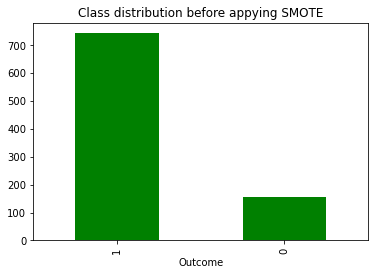

In [9]:
pd.Series(y_train).value_counts().plot(kind='bar',color='green',title='Class distribution before appying SMOTE', xlabel='Outcome')


In [10]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

- **Checking distribution after applying smote**

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

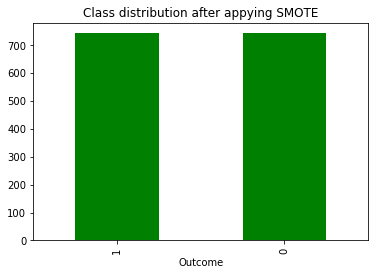

In [11]:
pd.Series(y_smote).value_counts().plot(kind='bar',color='green',title='Class distribution after appying SMOTE', xlabel='Outcome')


# Model Creation(TRAINING DATA):-

**AIM**
- To create a generalised model having low bias and low variance.

**ALGORITHMS USED**
- Logistic Regression
- Support Vector Machine(Classifier)
- Support Vector Machine(Classifier)-Hyperparameter tuning.
- K-Nearest Neighbour(Classifier)
- K-Nearest Neighbour(Bagging)-Ensemble technique.
- Decision Tree(Classifier)
- Decision Tree(Classifier)-Hyperparameter tuning.
- Random Forest.
- Random Forest-Hyperparameter tuning
- Gradient Bossting- Boosting Technique.
- Artificial Neural Network.

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [13]:
clf.fit(X_smote,y_smote) 

LogisticRegression()

**Prediction on train data**

In [14]:
log_train_predict = clf.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [15]:
print('The f1 score for training data is: ',f1_score(y_smote,log_train_predict)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,log_train_predict)*100)
print('The precision score for training data is: ',precision_score(y_smote,log_train_predict)*100)
print('The recall score for training is: ',recall_score(y_smote,log_train_predict)*100)
print("Logistic Regression(training score) : \n",classification_report(y_smote,log_train_predict))

The f1 score for training data is:  90.12517385257301
The accuracy score for training data is:  90.44414535666218
The precision score for training data is:  93.23741007194245
The recall score for training is:  87.21399730820995
Logistic Regression(training score) : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       743
           1       0.93      0.87      0.90       743

    accuracy                           0.90      1486
   macro avg       0.91      0.90      0.90      1486
weighted avg       0.91      0.90      0.90      1486



In [16]:
x=PrettyTable()

In [17]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall",]
x.add_row(["Logistic Regression", "90.12","90.44","93.23","87.21"])

In [18]:
print(x)

+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |  90.12   |  90.44   |   93.23   | 87.21  |
+---------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has low variance as seen from the above table.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Support Vector Machine - Classifier

In [19]:
from sklearn.svm import SVC
clf1 = SVC()

In [20]:
clf1.fit(X_smote, y_smote) # Training the model

SVC()

**Prediction on train data**

In [21]:
svm_pred_train1 = clf1.predict(X_smote) #training

**MODEL EVALUATION OF TRAINING DATA**

In [22]:
print('The f1 score for training data is: ',f1_score(y_smote,svm_pred_train1)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,svm_pred_train1)*100)
print('The precision score for training data is: ',precision_score(y_smote,svm_pred_train1)*100)
print('The recall score for training data is: ',recall_score(y_smote,svm_pred_train1)*100)
print("Support Vector Machine(training score) : \n",classification_report(y_smote,svm_pred_train1))

The f1 score for training data is:  98.9816700610998
The accuracy score for training data is:  98.99057873485869
The precision score for training data is:  99.86301369863013
The recall score for training data is:  98.1157469717362
Support Vector Machine(training score) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       743
           1       1.00      0.98      0.99       743

    accuracy                           0.99      1486
   macro avg       0.99      0.99      0.99      1486
weighted avg       0.99      0.99      0.99      1486



In [23]:
x=PrettyTable()

In [24]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine(Classifier)", "98.98","98.99","99.86","98.11"])

In [25]:
print(x)

+------------------------------------+----------+----------+-----------+--------+
|            Model(Train)            | f1_score | accuracy | precision | recall |
+------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine(Classifier) |  98.98   |  98.99   |   99.86   | 98.11  |
+------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**
- The training score has low variance as seen from the above table.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- But still hyperparameter tuning was done to check if the model's training score could be better.

# Hyperparameter tuning- Support Vector Machine( Classifier)

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf1,X_smote,y_smote,cv=3,scoring='f1') ## instead of svclassifier we can also give models like linear regression an dlogistic regression
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())


[0.94093686 0.95798319 0.96218487]
Cross validation Score: 0.9537016435902262
Std : 0.009187608950588061


In [27]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.685 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.665 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.665 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.779 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.935 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.945 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.918 total time=   0.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.896 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.893 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.876 total time=   0.2s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.874 total time=   0.2s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.889 total time=   0.2s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.876 total time=   0.2s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.958 total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.979 total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   0.2s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.993 total time=   0.2s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.990 total time=   0.2s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.953 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.940 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.962 total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [28]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1}
SVC(C=10, gamma=0.1, random_state=42)


In [29]:
clf2=SVC(C=10, gamma=0.1, random_state=42)

In [30]:
clf2.fit(X_smote, y_smote)

SVC(C=10, gamma=0.1, random_state=42)

**Prediction on train data**

In [31]:
pred2 = clf2.predict(X_smote) #training

**MODEL EVALUATION OF TRAINING DATA**

In [32]:
print('The f1 score for training data is: ',f1_score(y_smote,pred2)*100)
print('The accuracy score for training data is:',accuracy_score(y_smote,pred2)*100)
print('The precision score for training data is:',precision_score(y_smote,pred2)*100)
print('The recall score for training data is:',recall_score(y_smote,pred2)*100)
print("Support Vector Machine(training score)-TUNED : \n",classification_report(y_smote,pred2))

The f1 score for training data is:  100.0
The accuracy score for training data is: 100.0
The precision score for training data is: 100.0
The recall score for training data is: 100.0
Support Vector Machine(training score)-TUNED : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [34]:
x=PrettyTable()

In [35]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine(Classifier)-TUNED", "100","100","100","100"])

In [36]:
print(x)

+------------------------------------------+----------+----------+-----------+--------+
|               Model(Train)               | f1_score | accuracy | precision | recall |
+------------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine(Classifier)-TUNED |   100    |   100    |    100    |  100   |
+------------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- After performimg hyperparameter tuning, the model's training score was increased and overfitting condition can be seen.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# K- Nearest Neighbour(Classifier)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

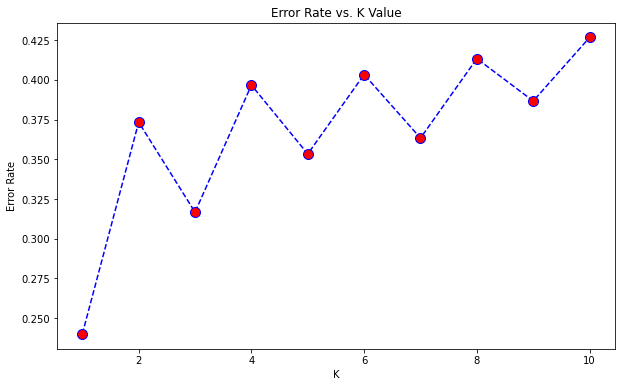

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_smote, y_smote) # Training the model

KNeighborsClassifier(n_neighbors=9)

**Prediction on train data**

In [41]:
X_pred_train = knn.predict(X_smote) #training

**MODEL EVALUATION OF TRAINING DATA**

In [42]:
print('The f1 score for training data is: ',f1_score(y_smote,X_pred_train)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,X_pred_train)*100)
print('The precision score for training data is: ',precision_score(y_smote,X_pred_train)*100)
print('The recall score for training data is: ',recall_score(y_smote,X_pred_train)*100)
print("K-Nearest Neighbour(training score) : \n",classification_report(y_smote,X_pred_train))

The f1 score for training data is:  79.08868999186329
The accuracy score for training data is:  82.70524899057874
The precision score for training data is:  100.0
The recall score for training data is:  65.41049798115746
K-Nearest Neighbour(training score) : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       743
           1       1.00      0.65      0.79       743

    accuracy                           0.83      1486
   macro avg       0.87      0.83      0.82      1486
weighted avg       0.87      0.83      0.82      1486



In [43]:
x=PrettyTable()

In [44]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["K Nearest Neighbor", "79.08","82.70","100","65.41"])

In [45]:
print(x)

+--------------------+----------+----------+-----------+--------+
|    Model(Train)    | f1_score | accuracy | precision | recall |
+--------------------+----------+----------+-----------+--------+
| K Nearest Neighbor |  79.08   |  82.70   |    100    | 65.41  |
+--------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The train score has high variance as seen in the table above so the training scores can't be considered.
- For better performance of the model bagging technique is used.

## K-Nearest Neighbour( Bagging) 

In [46]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=10,n_jobs=-1,random_state=42)#n_estimator is number of times model repeated 

model_bagg.fit(X_smote,y_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
                  random_state=42)

**Prediction on train data**

In [47]:
y_hat_bagg_train=model_bagg.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [48]:
print('The f1 score for training data is: ',f1_score(y_smote,y_hat_bagg_train)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,y_hat_bagg_train)*100)
print('The precision score for training data is: ',precision_score(y_smote,y_hat_bagg_train)*100)
print('The recall score for training data is: ',recall_score(y_smote,y_hat_bagg_train)*100)
print("K-Nearest Neighbour(training score)-BAGGING : \n",classification_report(y_smote,y_hat_bagg_train))

The f1 score for training data is:  78.4955028618152
The accuracy score for training data is:  82.3014804845222
The precision score for training data is:  100.0
The recall score for training data is:  64.6029609690444
K-Nearest Neighbour(training score)-BAGGING : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       743
           1       1.00      0.65      0.78       743

    accuracy                           0.82      1486
   macro avg       0.87      0.82      0.82      1486
weighted avg       0.87      0.82      0.82      1486



In [49]:
x=PrettyTable()

In [50]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["K-Nearest Neighbour(Bagging)", "78.49",'82.30','100','64.60'])

In [51]:
print(x)

+------------------------------+----------+----------+-----------+--------+
|         Model(Train)         | f1_score | accuracy | precision | recall |
+------------------------------+----------+----------+-----------+--------+
| K-Nearest Neighbour(Bagging) |  78.49   |  82.30   |    100    | 64.60  |
+------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score have changed to some extend but the scores still have high variance, so we can't consider this model to be a generalised model.
- But for better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Decision Tree:-

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)

In [53]:
dtr.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

**Prediction on train data**

In [54]:
X_pred_train13 = dtr.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [55]:
print('The f1 score for training data is: ',f1_score(y_smote,X_pred_train13)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,X_pred_train13)*100)
print('The precision score for training data is: ',precision_score(y_smote,X_pred_train13)*100)
print('The recall score for training data is: ',recall_score(y_smote,X_pred_train13)*100)
print("Decision Tree(training score): \n",classification_report(y_smote,X_pred_train13))

The f1 score for training data is:  100.0
The accuracy score for training data is:  100.0
The precision score for training data is:  100.0
The recall score for training data is:  100.0
Decision Tree(training score): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [56]:
x=PrettyTable()

In [57]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row([" Decision Tree", "100",'100','100','100'])

In [58]:
print(x)

+----------------+----------+----------+-----------+--------+
|  Model(Train)  | f1_score | accuracy | precision | recall |
+----------------+----------+----------+-----------+--------+
|  Decision Tree |   100    |   100    |    100    |  100   |
+----------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has overfitting condition as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- For more better performance, hyperparameter tuning was performed.

# Decision Tree(Hyperparameter tuning):-

In [59]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":(list(range(2, 20))),    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [60]:
tree_clf = DecisionTreeClassifier(random_state=1000)#object creation for decision tree with random state 1000

In [61]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [62]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv

Fitting 3 folds for each of 25992 candidates, totalling 77976 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [63]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})


In [64]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=7,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [65]:
dt1.fit(X_smote,y_smote)#training model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

**Prediction on train data**

In [66]:
X_pred_traindt1 = dt1.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [67]:
print('The f1 score for training data is: ',f1_score(y_smote,X_pred_traindt1)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,X_pred_traindt1)*100)
print('The precision score for training data is: ',precision_score(y_smote,X_pred_traindt1)*100)
print('The recall score for training data is: ',recall_score(y_smote,X_pred_traindt1)*100)
print("Decision Tree(training score)-TUNED: \n",classification_report(y_smote,X_pred_traindt1))

The f1 score for training data is:  98.03389830508475
The accuracy score for training data is:  98.04845222072677
The precision score for training data is:  98.77049180327869
The recall score for training data is:  97.30820995962316
Decision Tree(training score)-TUNED: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       743
           1       0.99      0.97      0.98       743

    accuracy                           0.98      1486
   macro avg       0.98      0.98      0.98      1486
weighted avg       0.98      0.98      0.98      1486



In [68]:
x=PrettyTable()

In [69]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row([" Decision Tree(tuned)", "98.03",'98.04','98.77','97.30'])

In [70]:
print(x)

+-----------------------+----------+----------+-----------+--------+
|      Model(Train)     | f1_score | accuracy | precision | recall |
+-----------------------+----------+----------+-----------+--------+
|  Decision Tree(tuned) |  98.03   |  98.04   |   98.77   | 97.30  |
+-----------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has low variance as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- The tuned model has low variance.

# Random Forest:-

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [72]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

**Prediction on train data**

In [73]:
X_pred_train15 = rf_clf.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [74]:
print('The f1 score for training data is: ',f1_score(y_smote,X_pred_train15)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,X_pred_train15)*100)
print('The precision score for training data is: ',precision_score(y_smote,X_pred_train15)*100)
print('The recall score for training data is: ',recall_score(y_smote,X_pred_train15)*100)
print("Random Forest(training score): \n",classification_report(y_smote,X_pred_train15))

The f1 score for training data is:  100.0
The accuracy score for training data is:  100.0
The precision score for training data is:  100.0
The recall score for training data is:  100.0
Random Forest(training score): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [75]:
x=PrettyTable()

In [76]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["Random Forest", "100",'100','100','100'])

In [77]:
print(x)

+---------------+----------+----------+-----------+--------+
|  Model(Train) | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Random Forest |   100    |   100    |    100    |  100   |
+---------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has overfitting condition as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- Hyperparameter tuning is done to reduce overfitting.

# Hyperparameter tuning( Random Forest):-

In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = (list(range(2, 20)))#minimum number of samples required to split an internal node
min_samples_leaf = (list(range(2, 20)))#minimum number of samples required to be at a leaf node.

In [79]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [80]:
#MODEL Creation
rf_clf1 = RandomForestClassifier(random_state=42)#model

In [81]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [82]:
rf_cv.fit(X_smote, y_smote) #training the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [84]:
rf_best_params = rf_cv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {rf_best_params}") 

Best paramters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 110}


In [85]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split= 4, min_samples_leaf= 2, 
                                 max_features= 'log2', max_depth= 110)

In [86]:
rf_clf2.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=110, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)

**Prediction on train data**

In [87]:
X_pred_train16 = rf_clf2.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [88]:
print('The f1 score for training data is: ',f1_score(y_smote,X_pred_train16)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,X_pred_train16)*100)
print('The precision score for training data is: ',precision_score(y_smote,X_pred_train16)*100)
print('The recall score for training data is: ',recall_score(y_smote,X_pred_train16)*100)
print("Random Forest(training score)-TUNED: \n",classification_report(y_smote,X_pred_train16))

The f1 score for training data is:  99.46236559139784
The accuracy score for training data is:  99.46164199192464
The precision score for training data is:  99.32885906040269
The recall score for training data is:  99.59623149394348
Random Forest(training score)-TUNED: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       743
           1       0.99      1.00      0.99       743

    accuracy                           0.99      1486
   macro avg       0.99      0.99      0.99      1486
weighted avg       0.99      0.99      0.99      1486



In [89]:
x=PrettyTable()

In [90]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row([" Random Forest (Hyperparameter)", '99.46','99.46','99.32','99.59'])

In [91]:
print(x)

+---------------------------------+----------+----------+-----------+--------+
|           Model(Train)          | f1_score | accuracy | precision | recall |
+---------------------------------+----------+----------+-----------+--------+
|  Random Forest (Hyperparameter) |  99.46   |  99.46   |   99.32   | 99.59  |
+---------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has low variance as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- The tuned model doesn't have any significant difference with the untuned model.

# Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
clf34 = GradientBoostingClassifier(random_state=44)

In [93]:
clf34.fit(X_smote,y_smote)#training model with best parameter

GradientBoostingClassifier(random_state=44)

**Prediction on train data**

In [94]:
boost2 = clf34.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [96]:
print('The f1 score for training data is: ',f1_score(y_smote,boost2)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,boost2)*100)
print('The precision score for training data is: ',precision_score(y_smote,boost2)*100)
print('The recall score for training data is: ',recall_score(y_smote,boost2)*100)
print("Gradient Boosting(training score): \n",classification_report(y_smote,boost2))

The f1 score for training data is:  99.66329966329965
The accuracy score for training data is:  99.66352624495289
The precision score for training data is:  99.73045822102425
The recall score for training data is:  99.59623149394348
Gradient Boosting(training score): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [97]:
x=PrettyTable()

In [98]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row(["Gradient Boosting", "99.66",'99.66','99.73','99.59'])

In [99]:
print(x)

+-------------------+----------+----------+-----------+--------+
|    Model(Train)   | f1_score | accuracy | precision | recall |
+-------------------+----------+----------+-----------+--------+
| Gradient Boosting |  99.66   |  99.66   |   99.73   | 99.59  |
+-------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score has low variance as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Artificial Neural Network [MLP Classifier]

In [100]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [101]:
# Fitting the training data
model.fit(X_smote,y_smote)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

**Prediction on train data**

In [102]:

mlp2= model.predict(X_smote)

**MODEL EVALUATION OF TRAINING DATA**

In [103]:
print('The f1 score for training data is: ',f1_score(y_smote,mlp2)*100)
print('The accuracy score for training data is: ',accuracy_score(y_smote,mlp2)*100)
print('The precision score for training data is: ',precision_score(y_smote,mlp2)*100)
print('The recall score for training data is: ',recall_score(y_smote,mlp2)*100)
print("Artificial Neural Network [MLP Classifier](training): \n",classification_report(y_smote,mlp2))

The f1 score for training data is:  100.0
The accuracy score for training data is:  100.0
The precision score for training data is:  100.0
The recall score for training data is:  100.0
Artificial Neural Network [MLP Classifier](training): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [104]:
x=PrettyTable()

In [105]:
x.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
x.add_row([" Artificial Neural Network [MLP Classifier]", "100",'100','100','100'])

In [106]:
print(x)

+---------------------------------------------+----------+----------+-----------+--------+
|                 Model(Train)                | f1_score | accuracy | precision | recall |
+---------------------------------------------+----------+----------+-----------+--------+
|  Artificial Neural Network [MLP Classifier] |   100    |   100    |    100    |  100   |
+---------------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The training score shows overfitting condition as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Conclusion:

- Eleven machine learning models i.e Logistic Regression, Support Vector Machine(Classifier),Support Vector Machine(Classifier)-Hyperparameter tuning, K-Nearest Neighbour(Classifier),K-Nearest Neighbour(Bagging)-Ensemble technique, Decision Tree(Classifier), Decision Tree(Classifier)-Hyperparameter tuning, Random Forest, Random Forest-Hyperparameter tuning, Gradient Bossting- Boosting Technique and Artificial Neural Network were examined to predict the performance rating of the employees in the company.
- Ensemble techniques such as bagging and boosting is also used.
- The training and testing data were used to train and test the data.These records were used to extract a number of characteristics.My suggested model can estimate the performance rating of the employees in the business level.
- The original dataset was a multiclass classification task but for better understanding and better model evaluation the dataset was converted into a binary classification task.
- Almost all the model performed well in the training data with good f1-score,accuracy,precision and recall.
- For better understanding and to conclude about the data, the testing score of the model is also important.
- In the summary report the details training and testing scores are mentioned along with the best model.
